In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.random import RandomState
from scipy import stats

In [2]:
def metropolis_hastings(uniform_rng, chain_start, n, logtarget, candidate_generating_density):
    x = chain_start
    chain = np.zeros(2 * n).reshape(2,n)
    accepted = 0
    
    for i in range(n):
        candidate = candidate_generating_density(x)
        
        if np.log(uniform_rng.uniform()) < logtarget(candidate) - logtarget(x):
            x = candidate
            accepted += 1
        
        chain[:,i] = x.reshape(2,)
        
    print(f"Hyväksyttyjä kandidaatteja: {(accepted/n)*100:.1f} %")
    return chain

In [3]:
uniform_rng = RandomState(1729)
proposal_rng = RandomState(2)

mu = np.array([[1], [2]])
sigma = np.array([[1, 0.9], [0.9, 1]])
sigma_inverse = np.linalg.inv(sigma)

# Multinormaalijakauman tiheysfunktion logaritmi ilman normalisointivakioita
logtarget = lambda x: -0.5 * np.transpose(x - mu) @ sigma_inverse @ (x - mu)
# Autoregressive generating density
proposal_density = lambda x: mu - (x - mu) + proposal_rng.uniform(low=-1, high=1, size=2).reshape(2,1)

chain = metropolis_hastings(uniform_rng, np.array([[1.0], [2.0]]), 12000, logtarget, proposal_density)
print(f"Ketjun muoto {chain.shape}")

chain_without_burn_in = chain[:, chain.shape[1] // 2:]
print(f"Ketjun muoto burn-in jakson poiston jälkeen {chain_without_burn_in.shape}")

Hyväksyttyjä kandidaatteja: 47.3 %
Ketjun muoto (2, 12000)
Ketjun muoto burn-in jakson poiston jälkeen (2, 6000)


In [4]:
scipy_multinormal = multivariate_normal.rvs(mean=mu.reshape(2,), cov=sigma, size=4000, random_state=RandomState(99)).T
print(scipy_multinormal.shape)

(2, 4000)


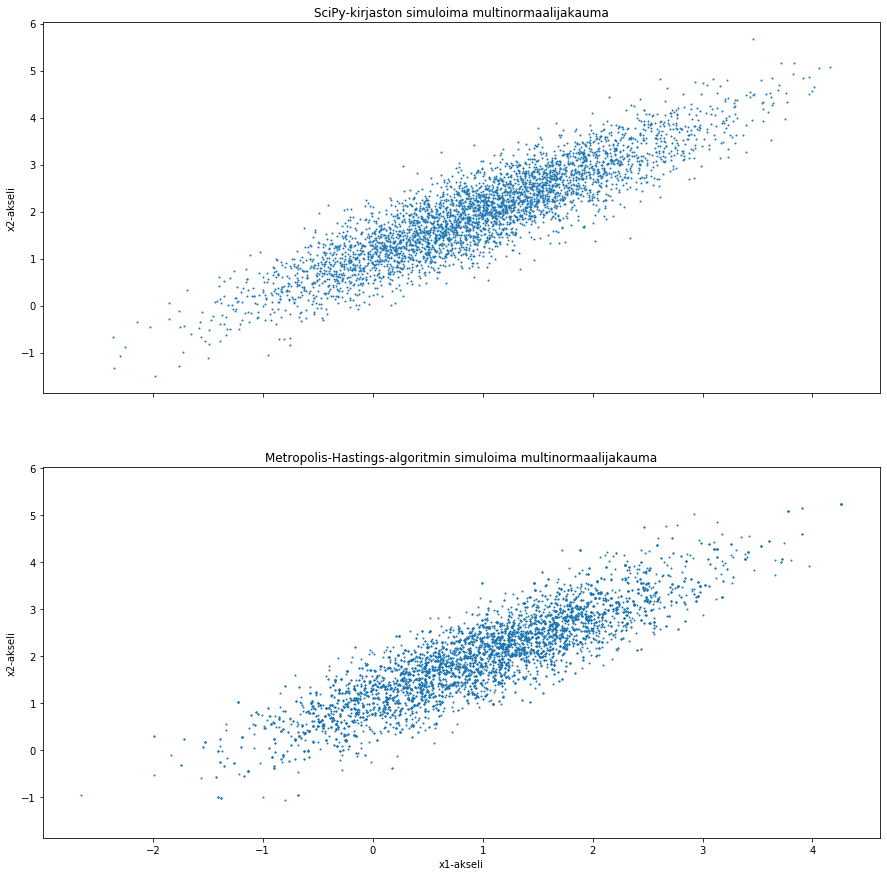

In [5]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(15)

ax[0].scatter(scipy_multinormal[0], scipy_multinormal[1], s=1)
ax[0].set_title("SciPy-kirjaston simuloima multinormaalijakauma")

ax[1].scatter(chain_without_burn_in[0,:], chain_without_burn_in[1,:], s=1)
ax[1].set_title("Metropolis-Hastings-algoritmin simuloima multinormaalijakauma")

for axis in ax.flat:
    axis.set(xlabel='x1-akseli', ylabel='x2-akseli')
    axis.label_outer()
    
plt.show()

Hyväksyttyjä kandidaatteja: 46.1 %
0.976329013802897
(0.9674280881881714, 0.01409732922911644)
2.000409150970354
(0.9406676888465881, 0.00021179374016355723)


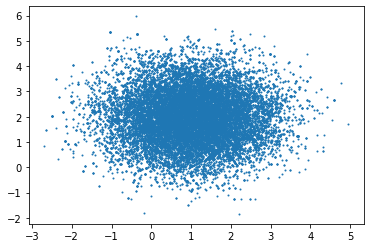

In [10]:
uniform_rng = RandomState(172)
proposal_rng = RandomState(20)
mu = np.array([[1], [2]])
sigma = np.array([[1.0, 0.0], [0.0, 1.0]])
sigma_inverse = np.linalg.inv(sigma)

# Multinormaalijakauman tiheysfunktion logaritmi ilman normalisointivakioita
logtarget = lambda x: -0.5 * np.transpose(x - mu) @ (x - mu)
# Autoregressive generating density
proposal_density = lambda x: mu - (x - mu) + 2*RandomState().uniform(low=-1, high=1, size=2).reshape(2,1)
n = 50000
chain = metropolis_hastings(RandomState(), np.array([[1.0], [2.0]]), n, logtarget, proposal_density)
without = chain[:, chain.shape[1] // 2:]

#print(without[0, :100])
print(np.average(without[0,:]))
print(stats.shapiro(without[0,:100]))
#print(without[1, :100])
print(np.average(without[1,:]))
print(stats.shapiro(without[1,:100]))

plt.scatter(without[0], without[1], s=1)
plt.show()